# Homework 2: Numerical integration
**Due Friday, April 17**

Brian Abaoag

### Homework checklist

Before submitting, make sure that you

- Fill in your name in the space above
- Cite any resources that you used while working on this homework
- 1.a. Fill in the code cell to write a function that performs integration using Simpson's rule  
- 1.b. Run the code cell to test the function, then comment on the results below  
- 2.a. Write your own code to evaluate the Bessel function  
- 2.b. Run the code cell to test the function, then comment on the results below  
- 2.c. Fill in the code block to evaluate the Bessel functions and plot the results  

## 1. Integration with Simpson's rule

Write a function to perform integration using **Simpson's rule**. The input parameters to the integrator function should be:
* A function, $f$
* Two real numbers giving the limits of integration
* The number of subdivisions $N$ to use for estimating the integral

There are many different ways that you could implement integration using Simpson's rule (for example, see Chapter 5 of Newman's *[Computational Physics](http://www-personal.umich.edu/~mejn/cp/chapters.html)*). You are free to choose any approach that you like. If you're already comfortable with Python, you might want to try an implementation that uses numpy arrays and [vectorization](https://realpython.com/numpy-array-programming/).

### 1.a. Write the integration function

Fill in the function outline below. If you're having trouble getting started, try writing out all the individual computations that need to be performed to estimate the integral. Then, code each one of them individually.

In [46]:
import numpy as np

def integrate(f, a, b, N_div):
    """
    Integrate the input univariate function, function_name, 
    between lower_limit and upper_limit using Simpson's rule 
    and return the result. The integral bounds will be 
    subdivided into N_div divisions to estimate the integral.
    """
    
    # Fill in your code here
    
    # Indicating that number of divisions must be even
    
    if N_div%2==1:
        N_div += 1
    
    # Setting List of Points
    
    dx = (b - a) / N_div
    
    # Performing the sum 
    
    total = 0
    for i in range(N_div):
        if i%2==0:
            continue
            
        total += ( dx / 3) * (f(a + (i - 1) * dx) + 4 * f(a + i * dx) + f(a + (i + 1) * dx))
    
    return total # Return the result here

### 1.b. Test the function

Test your function in the cell below.

In [93]:
def test_quad(x): 
    return 3*x**2

print(integrate(test_quad, 0, 1, 100))
print(integrate(test_quad, 0, 1, 1000))
print(integrate(test_quad, 0, 1, 1000000000))

#Just wanted to try out other computations. 

#Source: Lecture 4 Video from PHYS 177 GitHub

1.0
0.9999999999999998
1.0000000000001494


In [43]:
def test_quad2(x):
    return np.exp(-x**2)    

#I forgot to import "numpy" at first, so I added imported later on.

#Source: Lecture 4 Video from PHYS 177 GitHub

In [47]:
print(integrate(test_quad2, 0, 1, 100))

#I wanted to try the print function. 

0.746824132894176


In [87]:
def another_function(x):
    return (1 / x)

print(integrate(another_function, 1, 3, 100))

#Just wanted to try out another function. 
#Source: Lecture 4 Video from PHYS 177 GitHub

1.098612293930536


In [88]:
test1 = integrate(test_quad2, 0, 1, 100)
test2 = integrate(another_function, 1, 3, 100)

print(test2 - test1)

#Just wanted to try out other operations. 
#Source: Lecture 4 Video from PHYS 177 GitHub

0.35178816103636


Compare your output with the analytical result here. Does it perform as expected?

Computing the integral, the answer I get for $$\int_{0}^{1}3x^2dx=1$$ is 1. 
When I compute the integral using Simpson's Rule, the value is slightly over 1 when the number
of divisions increases. 

The difference when the number of divisions is 1000000000 is:
$$1-1.0000000000001494=.0000000000001494$$. 
It is a .0000000000001494 difference which is about an error of 1.5E-11 %.

In [96]:
print ("Yes, it does perform as expected.")

Yes, it does perform as expected.


## 2. Application: diffraction patterns generated by a circular aperture

When might we need to perform numerical integration? Here is one example from Exercise 5.4 in Newman's [Computational Physics](http://www-personal.umich.edu/~mejn/cp/chapters.html) textbook.

When light with wavelength $\lambda$ passes through a circular aperture, as in a telescope, it doesn't produce just a single point of light in the focal plane. Rather, the light is *diffracted*, producing a central bright spot surrounded by alternating bright and dark rings. Mathematically, the intensity of the focused light is given by

$$I(r) = \frac{J_1(kr)}{kr}^2\,,$$

where $r$ is the distance from the center of the focal plane, $k = 2\pi/\lambda$, and $J_1$ is the order 1 [Bessel function](https://en.wikipedia.org/wiki/Bessel_function) of the first kind. For more information, follow the Wikipedia link. Bessel functions appear very frequently in physics.

One way to define the Bessel functions $J_m$ is through an integral,

$$ J_m(x) = \frac{1}{\pi}\int_0^\pi\!d\theta\; \cos(m\theta - x \sin \theta) \, $$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

In the rest of the exercise below, we'll write a function to evaluate the Bessel function using our integrator defined in part 1. Then we'll test it and plot the results.

### 2.a. Write the Bessel function

Write your own version of the Bessel function by filling in the cell below. We'll assume that the number of divisions is 1000.

In [75]:
def J(m, x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 divisions.
    """
    
    # Fill in your code here, using the integrate function you defined in part 1
    
    # You might want to define a local function for the integrand
    def integrand(theta):
        return (1 / np.pi) * np.cos (m * theta - x * np.sin (theta)) # Return the integrand here
    
    total = integrate(integrand, 0, np.pi, 1000) 
    
    return total  # Return your result here

### 2.b. Test the function

Now, test your function in the cell below.

In [76]:
print(J(1,1))

#Sources Used:
#Simpson's Rule Calulator (http://nastyaccident.com/calculators/calculus/displayAnswer)
#Used to compare the computed answer.

0.4400505857449336


How does this compare with the expected result? Let's check our answer against the builtin Bessel function evaluator in `scipy`.

In [77]:
import scipy.special as sp

print(J(1,1) - sp.jv(1, 1))

5.551115123125783e-17


### An aside 

Why are we implementing our own method to evaluate the Bessel function when another one already exists? As you might have guessed, this is just for practice, and practice works best when there are well-established results that you can compare with. 

In your own computational adventures, the first step in any problem is to **check whether someone else has already solved it first**. If a solution exists, it will almost always be better to use the existing software and build on top of it, rather than "reinventing the wheel." Why? Consider the frenzied activity in the [numpy repository](https://github.com/numpy/numpy) on GitHub. Hundreds of people are working to ensure that numpy is fast and accurate. This is not a situation where a team of 1 can compete.

However, in research or industry we may encounter niche problems that have not yet been solved, or where standard techniques fail. In these cases we may indeed need to start from the beginning.

### 2.c. Plot the Bessel function(s)

Now, let's use our function `J(m, x)` to plot three different Bessel functions, $J_0(x)$, $J_1(x)$ and $J_2(x)$. Your job is to fill in the following code to produce these plots. The outline below uses `seaborn`, but you're also welcome to use `matplotlib` directly if you'd like.

*Hint*: You can check your answers by consulting [Wikipedia](https://en.wikipedia.org/wiki/Bessel_function).

*Hint*$^2$: Your function for evaluating the Bessel functions might take a little bit of time. You can potentially make it faster, and easier to use, with the `numpy.vectorize` function. For more information, look [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html). If you vectorize `J(m, x)` then it will be able to operate on entire numpy arrays at once.

/Users/brianabaoag/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/brianabaoag/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/brianabaoag/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/brianabaoag/opt/anaconda3/lib/python3.7/site

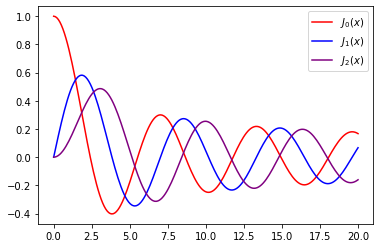

In [99]:
import seaborn as sns
import numpy as np

# x sample points
x = np.linspace(0, 20, 200)
np.vectorize (J)

y0 = J(0,x) # FILL THIS IN, y-values of J0(x)
y1 = J(1,x) # FILL THIS IN, y-values of J1(x)
y2 = J(2,x) # FILL THIS IN, y-values of J2(x)

sns.lineplot(x, y0, label='$J_0(x)$', c="red")

sns.lineplot(x, y1, label='$J_1(x)$', c="blue")

sns.lineplot(x, y2, label='$J_2(x)$', c="purple") 

#Sources used:
#Bessel Function Information from Wikipedia (https://en.wikipedia.org/wiki/Bessel_function#Bessel's_integrals)
#Vectorize Function (https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html)
#Both sources used for information to code the plot. 